In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tools

In [3]:
# wall spacing blade
nxp_p=np.array([    0.06317555863648920134   ,  0.15387840527645010869])
nxp_pm1=np.array([    0.06328761062334230247  ,   0.15379203379380579353])
a=np.sqrt((nxp_p[0]-nxp_pm1[0])**2+(nxp_p[1]-nxp_pm1[1])**2)
print a,5.*a

0.000141476785276 0.000707383926378


In [4]:
np_bl=140
bl_thick=0.3
span=3.0
spacing_wall=0.00015

In [5]:
sp_half=span/2.

In [6]:
#span spacing in simulations with homogenous span
print 0.2/100.

0.002


In [7]:
con=[]
Vcon=[]
### Value constraints
Vcon.append([1,0.0])
Vcon.append([np_bl,bl_thick])
con.append(Vcon)
### 1.st Derivative/spacing constraint
Dcon=[]
Dcon.append([1,spacing_wall])
con.append(Dcon)
### 2.nd Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_bl,0])
con.append(Dcon)
### 3.rd Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_bl,0])
con.append(Dcon)
### 4.th Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_bl,0])
con.append(Dcon)

p3=tools.polynomial(con)
        
x3=range(1,Vcon[-1][0]+1)
y3=np.zeros(len(x3))
y3=p3.evaluate(x3,maxd=6)

sp_free=y3[1][-1]
np_free=int((span/2.-bl_thick)/sp_free)+1
print 'spacing at wall and in freestream ',y3[1][0],y3[1][-1]
print 'Points in free stream ',np_free
con=[]
Vcon=[]
### Value constraints
Vcon.append([1,bl_thick])
Vcon.append([np_free,span/2])
con.append(Vcon)
### 1.st Derivative/spacing constraint
Dcon=[]
Dcon.append([1,sp_free])
con.append(Dcon)
### 2.nd Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_free,0])
con.append(Dcon)
## 3rd Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_free,0])
con.append(Dcon)

## 4th Deriv
Dcon=[]
Dcon.append([1,0.0])
Dcon.append([np_free,0])
con.append(Dcon)

p4=tools.polynomial(con)
x4=range(1,Vcon[-1][0]+1)
y4=np.zeros(len(x4))
y4=p4.evaluate(x4,maxd=6)


print 'maximum spacing and ratio between highest and gen spacing', max(y3[1][:]), max(y3[1][:])/y3[1][0] 
print 'maximum spacing and ratio between highest and gen spacing', max(y3[1]), min(y3[1]) 
print 

number of conditions 9
order of polynomial function is 8
spacing at wall and in freestream  0.00015 0.00416654676259
Points in free stream  289
number of conditions 9
order of polynomial function is 8
maximum spacing and ratio between highest and gen spacing 0.00416654676259 27.7769784173
maximum spacing and ratio between highest and gen spacing 0.00416654676259 0.00015



In [8]:
n_tot=2*np_bl+np_free*2-3
grid=np.empty(n_tot)
for i in range(np_bl):
    grid[i]=y3[0][i]
    grid[-i-1]=span-y3[0][i]
for i in range(1,np_free-1):
    grid[i+np_bl-1]=y4[0][i]    
for i in range(1,np_free):
    grid[-i-np_bl]=span-y4[0][i] 

In [9]:
print p4.coeffs

[  2.95833453e-01   4.16654676e-03  -2.46551753e-15   2.47404876e-15
  -1.24557034e-15   2.54256416e-16  -1.72397279e-18   4.23169666e-21
  -3.64801436e-24]


<IPython.core.display.Javascript object>


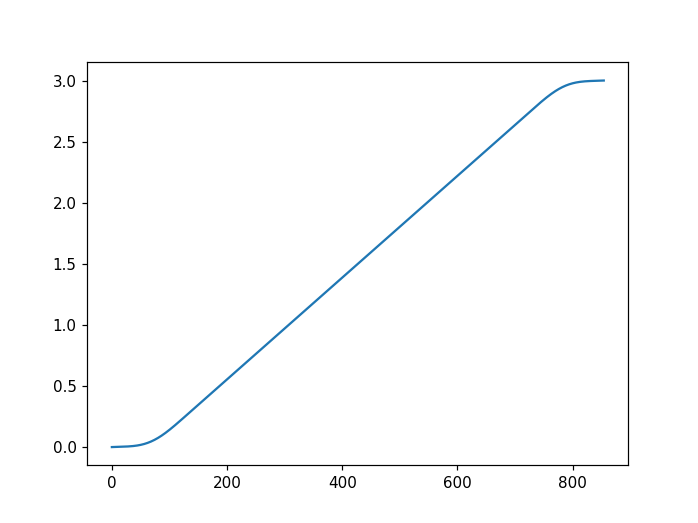

In [10]:
plt.figure()
plt.plot(grid[:])

In [11]:
print grid[-1]

3.0


In [13]:
cd ~/drive3/

/mnt/drive3/rp3e11


In [14]:
ifile=open('span_grid_fine_span1.dat','w')
ifile.write('%i \n'%n_tot)
for i in range(n_tot):
    ifile.write('%30.20f \n'%grid[i])
ifile.close()

<IPython.core.display.Javascript object>


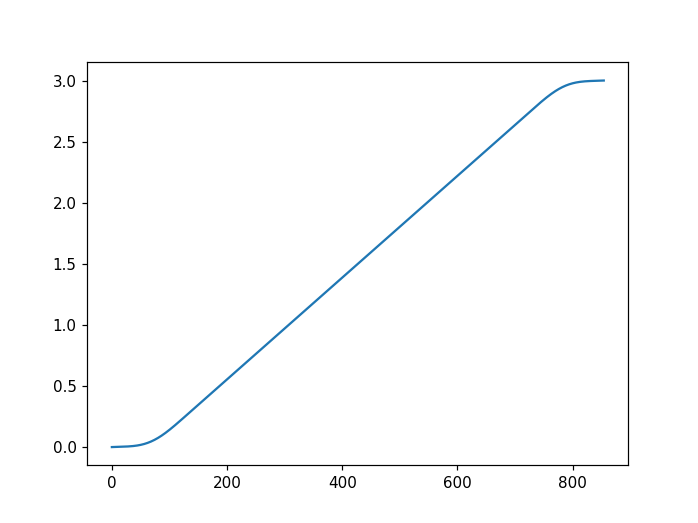

<IPython.core.display.Javascript object>


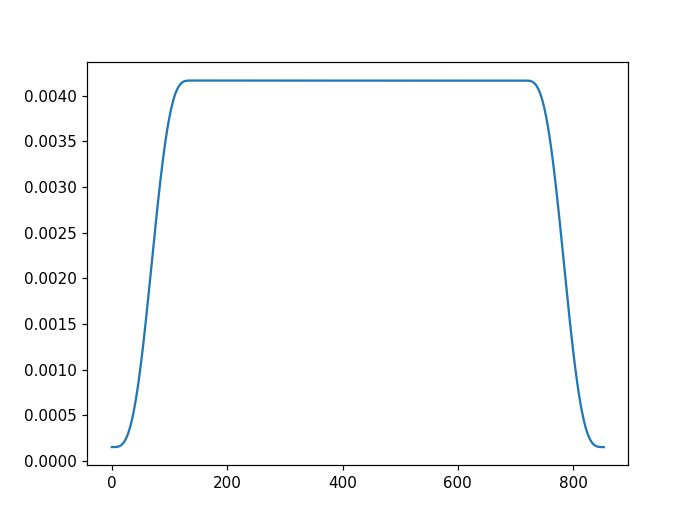

<IPython.core.display.Javascript object>


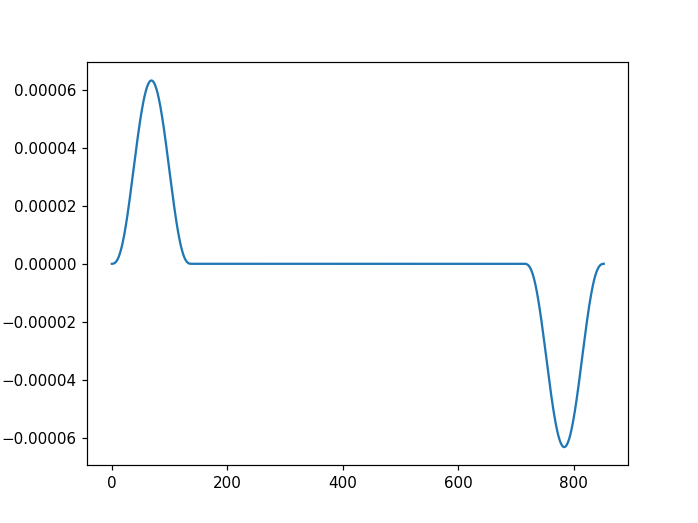

<IPython.core.display.Javascript object>


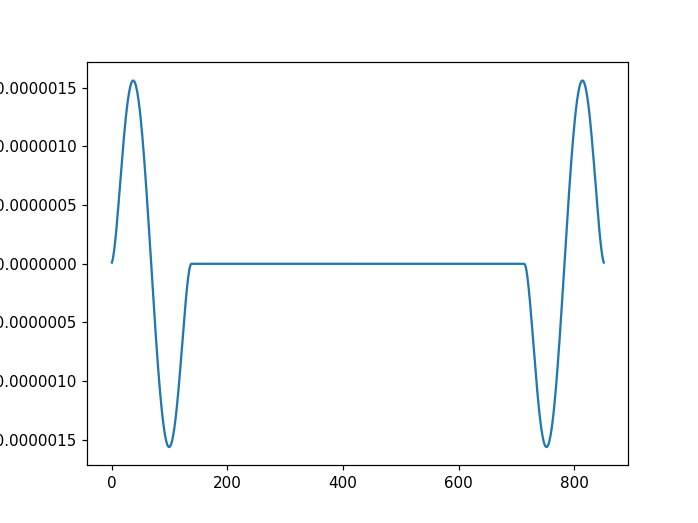

In [15]:
for i in range(4):
    plt.figure()
    plt.plot(np.diff(grid[:],n=i))

# Interpolate Schlatter Profiles

In [158]:
vel_p_schlatt=np.loadtxt('schlatter_vel_11000_no_head.prof')
vel_p_schlatt_06000=np.loadtxt('schlatter_vel_06000_no_head.prof')
vel_p=[]
ifile=open('Profiles_exp.dat','r')
rec=False
var=0
temp=[]
k_=0
for line in ifile:      
    if not rec:
        if line.startswith('ZONE'):
            tp_=line.split(',')
            for te_ in tp_:
                te__=te_.split('=')
                if te__[0]==' K':
                    nel=int(te__[1])

                    rec=True
    else:
        tp_=line.split()
        for val in tp_:
            temp.append(float(val))
            k_+=1
            if k_==nel:
                k_=0
                vel_p.append(temp)
                temp=[]

vel_p1=np.transpose(np.array(vel_p))        

vel_p=[]
ifile=open('Profiles_sim.dat','r')
rec=False
var=0
temp=[]
k_=0
for line in ifile:      
    if not rec:
        if line.startswith('ZONE'):
            tp_=line.split(',')
            for te_ in tp_:
                te__=te_.split('=')
                if te__[0]==' K':
                    nel=int(te__[1])
                    rec=True
    else:
        tp_=line.split()
        for val in tp_:
            temp.append(float(val))
            k_+=1
            if k_==nel:
                k_=0
                vel_p.append(temp)
                temp=[]

vel_p=np.transpose(np.array(vel_p))      


In [159]:
ifi=open('duden_fottner_500k_inlet_bl.csv','r')
dud_data=[]
for line in ifi:
    temp=line.split(',')
    dud_data.append([temp[0],temp[1]])
dud_data=np.array(dud_data)

<IPython.core.display.Javascript object>


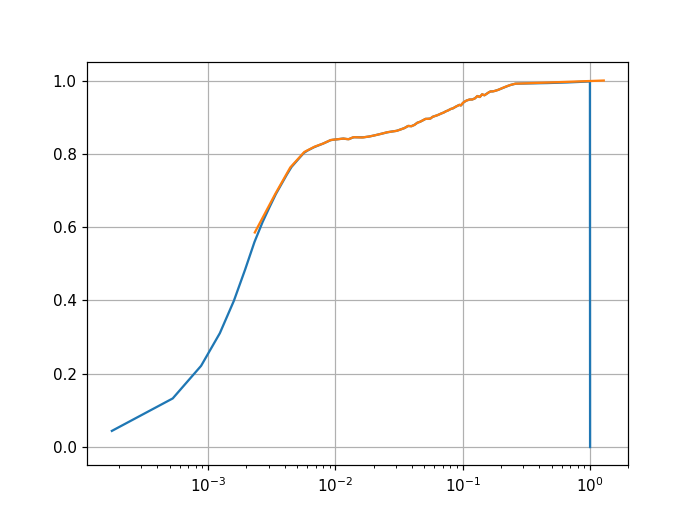

<IPython.core.display.Javascript object>


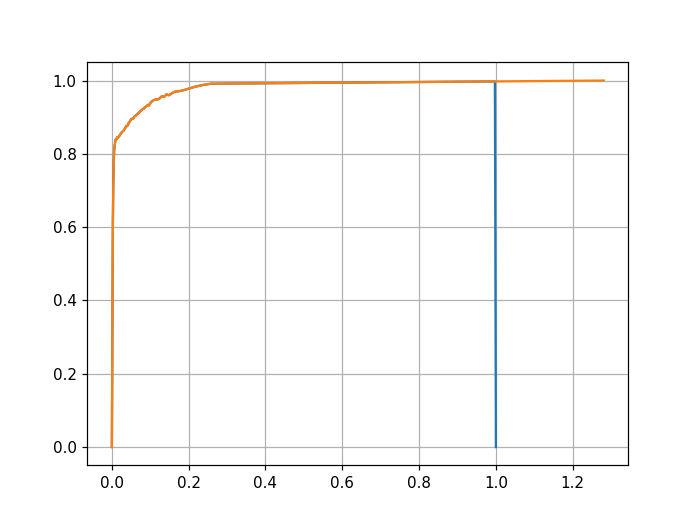

In [160]:
plt.figure()
plt.semilogx(vel_p[:,0],vel_p[:,1])
plt.semilogx(vel_p1[:,0],vel_p1[:,1])
plt.grid()
plt.figure()
plt.plot(vel_p[:,0],vel_p[:,1])
plt.plot(vel_p1[:,0],vel_p1[:,1])
plt.grid()

In [161]:
#scale data
bl_thick=0.26
u_plus=vel_p_schlatt[-1,2]
vel_p_schlatt[:,0]=vel_p_schlatt[:,0]*bl_thick
vel_p_schlatt[:,2]=vel_p_schlatt[:,2]/u_plus
vel_p_schlatt[:,3:6]=(vel_p_schlatt[:,3:6]/u_plus**2)**2
bl_thick=0.26
u_plus=vel_p_schlatt_06000[-1,2]
vel_p_schlatt_06000[:,0]=vel_p_schlatt_06000[:,0]*bl_thick
vel_p_schlatt_06000[:,2]=vel_p_schlatt_06000[:,2]/u_plus
vel_p_schlatt_06000[:,3:6]=(vel_p_schlatt_06000[:,3:6]/u_plus**2)**2

In [162]:
0.26*0.7

0.182

<IPython.core.display.Javascript object>


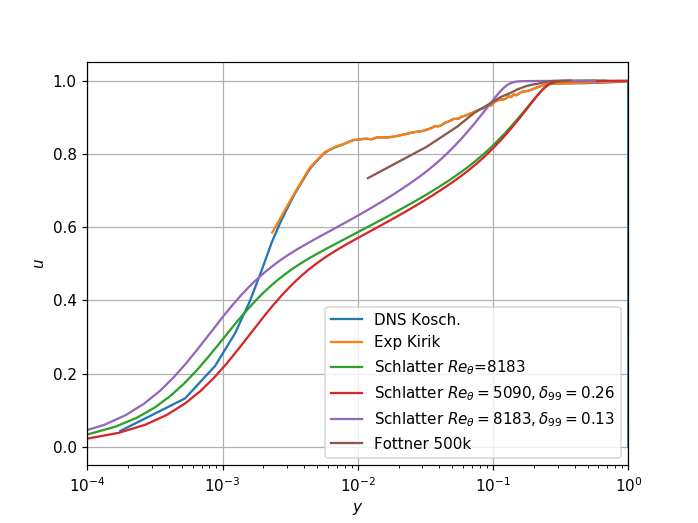

<IPython.core.display.Javascript object>


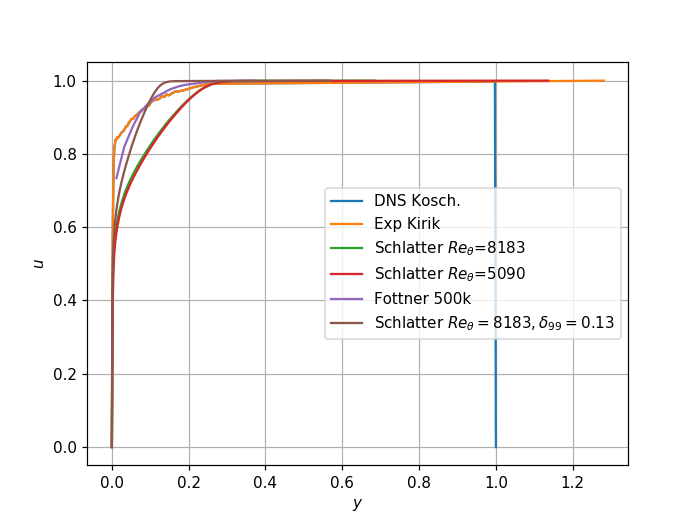

In [163]:
plt.figure()
plt.semilogx(vel_p[:,0],vel_p[:,1],label='DNS Kosch.')
plt.semilogx(vel_p1[:,0],vel_p1[:,1],label='Exp Kirik')
plt.semilogx(vel_p_schlatt[:,0],vel_p_schlatt[:,2],label=r'Schlatter $Re_\theta$=8183')
plt.semilogx(vel_p_schlatt_06000[:,0],vel_p_schlatt_06000[:,2],label=r'Schlatter $Re_{\theta}=5090,\delta_{99}=0.26$')
plt.semilogx(vel_p_schlatt_06000[:,0]*0.5,vel_p_schlatt_06000[:,2],label=r'Schlatter $Re_{\theta}=8183,\delta_{99}=0.13$')
plt.semilogx(dud_data[:,1],dud_data[:,0],label='Fottner 500k')
plt.grid()
plt.xlim(0.0001,1)
plt.xlabel('$y$')
plt.ylabel('$u$')
plt.legend()
plt.savefig('schlatt_vs_exp_dns.pdf')
plt.figure()
plt.plot(vel_p[:,0],vel_p[:,1],label='DNS Kosch.')
plt.plot(vel_p1[:,0],vel_p1[:,1],label='Exp Kirik')
plt.plot(vel_p_schlatt[:,0],vel_p_schlatt[:,2],label=r'Schlatter $Re_\theta$=8183')
plt.plot(vel_p_schlatt_06000[:,0],vel_p_schlatt_06000[:,2],label=r'Schlatter $Re_\theta$=5090')
plt.plot(dud_data[:,1],dud_data[:,0],label='Fottner 500k')
plt.plot(vel_p_schlatt_06000[:,0]*0.5,vel_p_schlatt_06000[:,2],label=r'Schlatter $Re_{\theta}=8183,\delta_{99}=0.13$')
plt.grid()
plt.legend()
plt.xlabel('$y$')
plt.ylabel('$u$')
plt.savefig('schlatt_vs_exp_dns_no_log.pdf')


In [183]:
data_arr=np.empty([len(grid),5])
data_arr[:,0]=grid
data_arr[:,1]=1.
data_arr[:,2:]=0.
i_cut=240
vel_p[-1,1]
for i,j in enumerate([1,2]):
    intp=np.interp(grid[:i_cut],vel_p[:,0],vel_p[:,j]/0.995)
    for k in range(i_cut):
        data_arr[k,i+1]=intp[k]
        data_arr[-k-1,i+1]=intp[k]
data_arr[:,2]=data_arr[:,2]**2
TI=0.05**2
for j in range(20,len(grid)-20):
    if data_arr[j,2]<TI:
        data_arr[j,2]=TI
data_arr[:,3]=data_arr[:,2]
data_arr[:,4]=data_arr[:,2]            

<IPython.core.display.Javascript object>


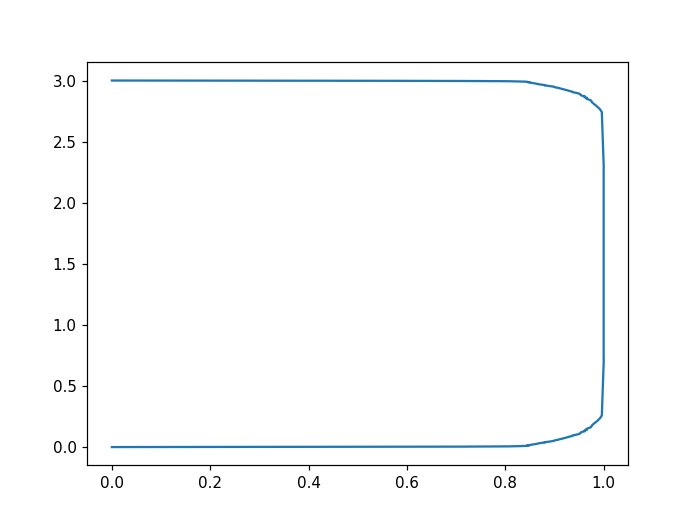

<IPython.core.display.Javascript object>


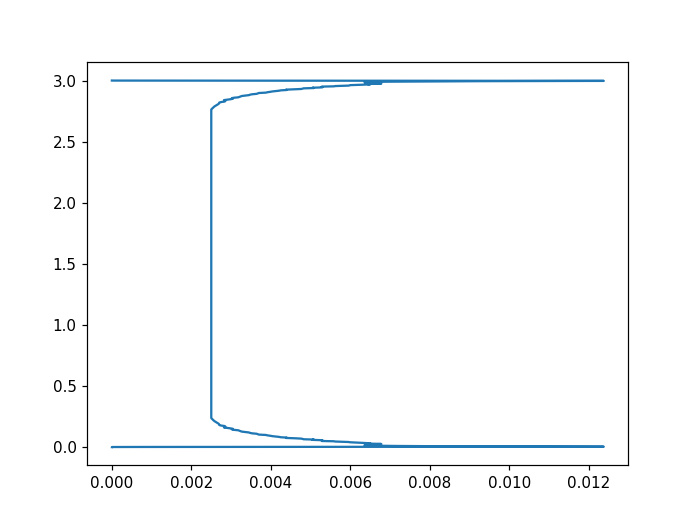

In [184]:
plt.figure()
plt.plot(data_arr[:,1],data_arr[:,0])
plt.figure()
plt.plot(data_arr[:,4],data_arr[:,0])

In [185]:
ofile=open('TBL_data.dat','w')
npts=len(grid)
ofile.write('%i \n'%npts)
for j in range(npts):
    ofile.write('%15.8f,%15.8f,%15.8f,%15.8f\n'%(data_arr[j,1],data_arr[j,2],data_arr[j,4],data_arr[j,3]))
ofile.close()